In [1]:
using Pkg
Pkg.activate("control")
Pkg.add("JuMP")
Pkg.add("Ipopt")
Pkg.add("Plots")

  Activating project at `~/cvs/MTH8408/notebooks_cours/control`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/cvs/MTH8408/notebooks_cours/control/Project.toml`
  No Changes to `~/cvs/MTH8408/notebooks_cours/control/Manifest.toml`
   Resolving package versions...
  No Changes to `~/cvs/MTH8408/notebooks_cours/control/Project.toml`
  No Changes to `~/cvs/MTH8408/notebooks_cours/control/Manifest.toml`
   Resolving package versions...
  No Changes to `~/cvs/MTH8408/notebooks_cours/control/Project.toml`
  No Changes to `~/cvs/MTH8408/notebooks_cours/control/Manifest.toml`


In [2]:
using JuMP, Ipopt

In [3]:
m = Model(Ipopt.Optimizer);

In [4]:
const N = 100
const h = 1/N
const x0 = 1.0
const gamma = 3

3

In [5]:
@variable(m, 0 ≤ u[1:N] ≤ 1, start=0)
@variable(m, x[1:N], start=x0);

In [6]:
@NLexpression(m, f[k = 1:N], (u[k] - 1) * x[k]);
@NLobjective(m, Min, 0.5 * h * sum(f[k] + f[k+1] for k = 1 : N-1));

In [7]:
@constraint(m, dx[k = 1 : N-1], x[k+1] - x[k] == 0.5 * h * gamma * (u[k] * x[k] + u[k+1] * x[k+1]));
@constraint(m, x[1] == x0);

In [8]:
optimize!(m)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      595
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      498

Total number of variables............................:      200
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      100
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality co

In [9]:
xs = value.(x);
us = value.(u);

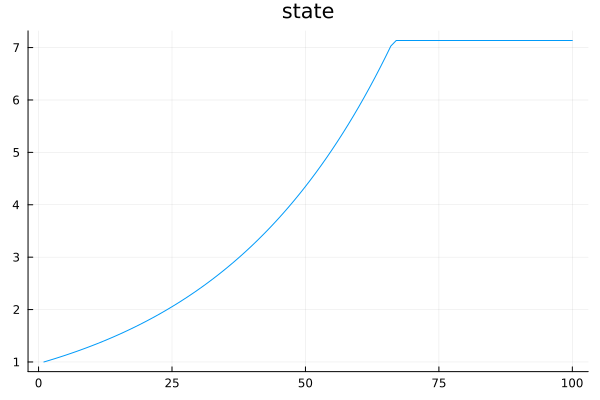

In [10]:
using Plots
plot(xs, title="state", legend=false)

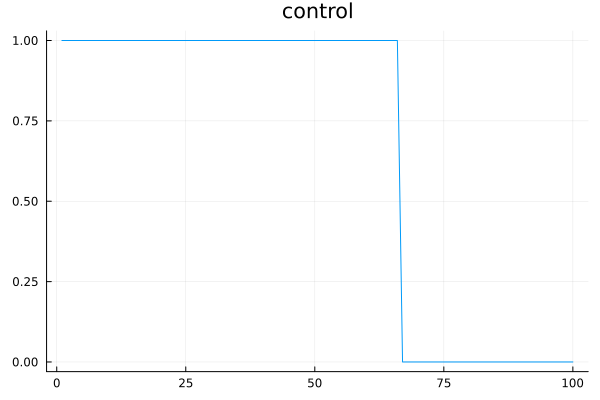

In [11]:
plot(us, title="control", legend=false)

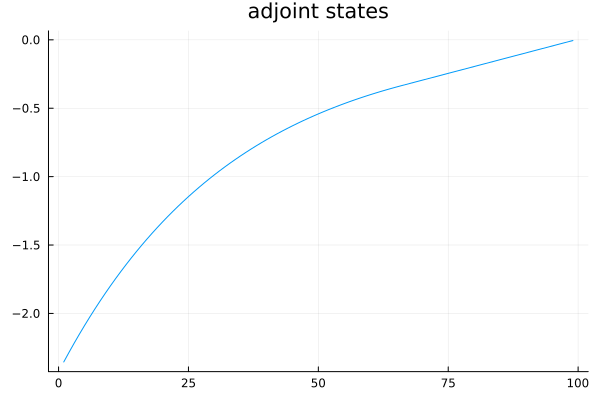

In [12]:
ps = dual.(dx)  # Lagrange multipliers are discretized adjoint states
plot(ps, title="adjoint states", legend=false)  # they could have the wrong sign because they correspond to equality constraints...

In [13]:
us[(us .> 0.1)]

66-element Vector{Float64}:
 0.9999999273632423
 0.999999969200487
 0.9999999689909381
 0.9999999687727432
 0.9999999685454604
 0.9999999683086186
 0.9999999680617154
 0.9999999678042142
 0.9999999675355412
 0.9999999672550823
 0.9999999669621794
 0.9999999666561263
 0.9999999663361644
 ⋮
 0.9999998917270666
 0.9999998824618415
 0.9999998712624495
 0.9999998574595916
 0.9999998400349244
 0.9999998173594069
 0.9999997866547667
 0.9999997427630556
 0.9999996749045751
 0.9999995561502101
 0.99999929506956
 0.9999982543698783

In [14]:
t = 1 - 1/gamma  # = T - 1/γ

0.6666666666666667